# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data 

In [2]:
year_2000 = pd.read_csv("Data/final_tmdbdata2000.csv.gz")
year_2001 = pd.read_csv("Data/final_tmdbdata2001.csv.gz")

## Join Data

In [3]:
# Combine both years 2001 & 2000 dataframes
tmdb_results_combined = pd.concat([year_2001,year_2000])

# EDA

## View Data

In [4]:
tmdb_results_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 1252
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2600 non-null   object 
 1   adult                  2598 non-null   float64
 2   backdrop_path          1436 non-null   object 
 3   belongs_to_collection  211 non-null    object 
 4   budget                 2598 non-null   float64
 5   genres                 2598 non-null   object 
 6   homepage               170 non-null    object 
 7   id                     2598 non-null   float64
 8   original_language      2598 non-null   object 
 9   original_title         2598 non-null   object 
 10  overview               2555 non-null   object 
 11  popularity             2598 non-null   float64
 12  poster_path            2355 non-null   object 
 13  production_companies   2598 non-null   object 
 14  production_countries   2598 non-null   object 
 15  rele

In [5]:
tmdb_results_combined.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/hfeiSfWYujh6MKhtGTXyK3DD4nN.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.331,1213.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,PG-13
3,tt0116916,0.0,/rFpHBidSlhjflmnLu7BZilyKeQR.jpg,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,73549.0,en,The Dark Mist,...,0.0,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,The Dark Mist,0.0,3.500,2.0,PG-13
4,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.438,129.0,PG-13


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [6]:
# Check how many movies had values over 0 for budget
budrev_total = (tmdb_results_combined['budget']) > 0 | (tmdb_results_combined['revenue'] > 0)
budrev_total1 = budrev_total.sum()
budrev_total1

548

In [8]:
print(f"{budrev_total1} movies had at least some valid financial information.")

548 movies had at least some valid financial information.


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [9]:
tmdb_results_combined['certification'].value_counts()

PG-13    2598
Name: certification, dtype: int64

Text(0.5, 0, 'Certification')

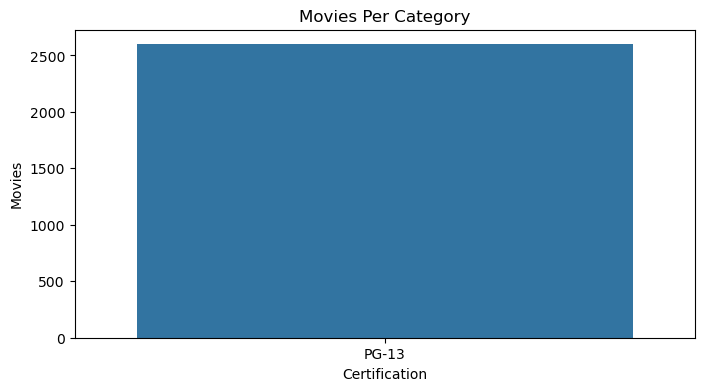

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=tmdb_results_combined, x='certification')
plt.title('Movies Per Category')
plt.ylabel('Movies')
plt.xlabel('Certification')


## What is the average revenue per certification category?

In [11]:
avg_rev = tmdb_results_combined.groupby('certification')['revenue'].mean()
avg_rev = round(avg_rev)
avg_rev

certification
PG-13    10818970.0
Name: revenue, dtype: float64

Text(0.5, 0, 'Average Revenue($)')

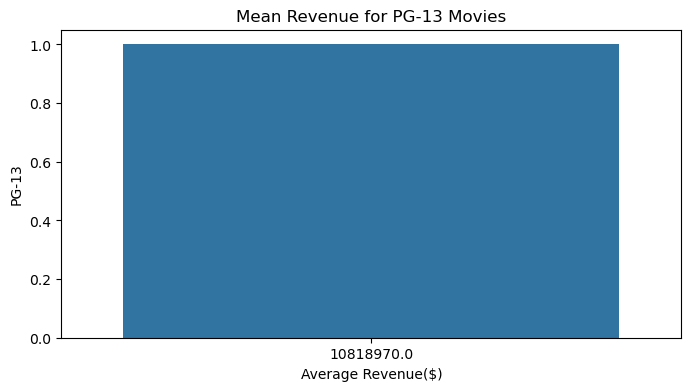

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=avg_rev, x= avg_rev)
plt.title('Mean Revenue for PG-13 Movies')
plt.ylabel('PG-13')
plt.xlabel('Average Revenue($)')


## What is the average budget per certification category?

In [13]:
avg_bug = tmdb_results_combined.groupby('certification')['budget'].mean()
avg_bug = round(avg_bug)
avg_bug

certification
PG-13    5147108.0
Name: budget, dtype: float64

Text(0.5, 0, 'Average Budget($)')

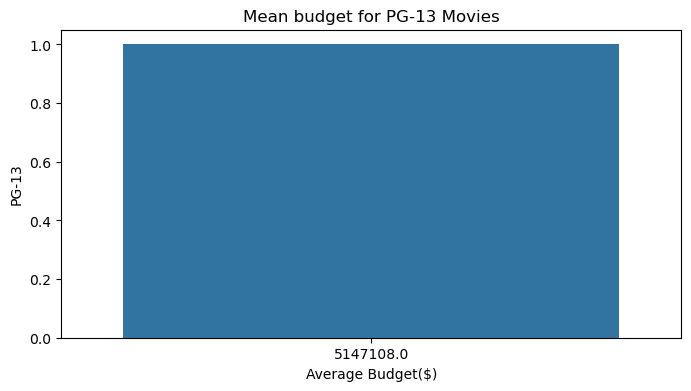

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=avg_bug, x= avg_bug)
plt.title('Mean budget for PG-13 Movies')
plt.ylabel('PG-13')
plt.xlabel('Average Budget($)')

In [15]:
# Save a final merged .csv.gz of all of the tmdb api data
tmdb_results_combined.to_csv("Data/tmdb_results_combined.csv.gz", 
                                compression="gzip", 
                                index=False)